In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

In [3]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
######################
####  CHALLENGE 5 ####
######################

In [8]:
#pyber_data_df.columns

In [9]:
# calculate the number of rides by city type
total_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]

# calculate the total drivers by city type
total_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]

# calculate the total-sum of fares by city type
total_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]

# average fare per ride by city type
avg_fare_ride_by_type = total_fares_by_type / total_rides_by_type

# average fare per driver by city type
avg_fare_driver_by_type = total_fares_by_type / total_drivers_by_type

#Create the summary data frame
rides_drivers_fares_df = pd.DataFrame({
    "Total Rides": total_rides_by_type,
    "Total Drivers": total_drivers_by_type,
    "Total Fares": total_fares_by_type,
    "Average Fare per Ride": avg_fare_ride_by_type,
    "Average Fare per Driver": avg_fare_driver_by_type,
}) 

# hide index name in the summary data frame
rides_drivers_fares_df.index.name = None

#Format the summary data frame
rides_drivers_fares_df["Total Rides"] = rides_drivers_fares_df["Total Rides"].map("{:,}".format)
rides_drivers_fares_df["Total Drivers"] = rides_drivers_fares_df["Total Drivers"].map("{:,}".format)
rides_drivers_fares_df["Total Fares"] = rides_drivers_fares_df["Total Fares"].map("${:,.2f}".format)
rides_drivers_fares_df["Average Fare per Ride"] = rides_drivers_fares_df["Average Fare per Ride"].map("${:,.2f}".format)
rides_drivers_fares_df["Average Fare per Driver"] = rides_drivers_fares_df["Average Fare per Driver"].map("${:,.2f}".format)

#output the summary data frame
rides_drivers_fares_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [10]:
# exam the merge dataframe columns
pyber_data_df.columns

Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'type'], dtype='object')

In [11]:
# rename columns more meaningful
pyber_data_df = pyber_data_df.rename(columns={'city':"City", 'date': "Date", 'fare': "Fare",
                                      'ride_id':"Ride Id", 'driver_count':"No. Drivers", 'type':"City Type"})

# Set the index to the Date column without drop Date column (drop=False)
pyber_data_df = pyber_data_df.set_index("Date",drop=False)
#pyber_data_df.head()

# deep copy the pyber data frame to a new data frame with a selected set of columns
pyber_city_fare_df = pyber_data_df[["Date","Fare","City Type"]].copy()
#pyber_city_fare_df.head()

# let drop or delete (del) the extra Date column in the new data frame
del pyber_city_fare_df["Date"]

# convert index to datetime index
pyber_city_fare_df.index = pd.to_datetime(pyber_city_fare_df.index)

#peak 5 top rows of the data frame
pyber_city_fare_df.head(10)

,Fare,City Type
Date,,
2019-01-14 10:14:22,13.83,Urban
2019-03-04 18:24:09,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:03,23.44,Urban
2019-03-06 04:28:35,34.58,Urban
2019-03-11 12:26:48,9.52,Urban
2019-02-27 11:17:56,43.25,Urban
2019-04-26 00:43:24,35.98,Urban
2019-01-08 03:28:48,35.09,Urban


In [12]:
# validate the new data frame data structure
pyber_city_fare_df.info()
#pyber_city_fare_df.dtypes

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fare       2375 non-null   float64
 1   City Type  2375 non-null   object 
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [13]:
# Calculate the sum of fare by city time and date ()
fares_by_type_date=pyber_city_fare_df.groupby(["City Type"]).resample('D').sum()["Fare"]
#type(fares_by_type_date) 

fares_by_type_date

City Type  Date      
Rural      2019-01-01     43.69
           2019-01-02     52.12
           2019-01-03     19.90
           2019-01-04     24.88
           2019-01-05      0.00
                          ...  
Urban      2019-05-04    323.57
           2019-05-05    322.10
           2019-05-06    181.20
           2019-05-07    258.01
           2019-05-08    170.82
Name: Fare, Length: 382, dtype: float64

In [14]:
# reset index of the dataframe back to discrete index
pyber_city_fare_df = pyber_city_fare_df.reset_index()

pyber_city_fare_df

,Date,Fare,City Type
0,2019-01-14 10:14:22,13.83,Urban
1,2019-03-04 18:24:09,30.24,Urban
2,2019-02-24 04:29:00,33.44,Urban
3,2019-02-10 23:22:03,23.44,Urban
4,2019-03-06 04:28:35,34.58,Urban
...,...,...,...
2370,2019-04-29 17:04:39,13.38,Rural
2371,2019-01-30 00:05:47,20.76,Rural
2372,2019-02-10 21:03:50,11.11,Rural
2373,2019-05-07 19:22:15,44.94,Rural


In [15]:
# Create a pivot data frame with index = Date, columns = City type and values = Fare
pivot_df = pyber_city_fare_df.pivot(index='Date',columns="City Type",values='Fare')
pivot_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [16]:
# Create a new data frame between '2019-01-01' to '2019-04-28'
range_date_01_04_df = pivot_df.loc['2019-01-01':'2019-04-28',:]
range_date_01_04_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [17]:
total_fare_date_01_04_df = range_date_01_04_df.resample("W").sum()
total_fare_date_01_04_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


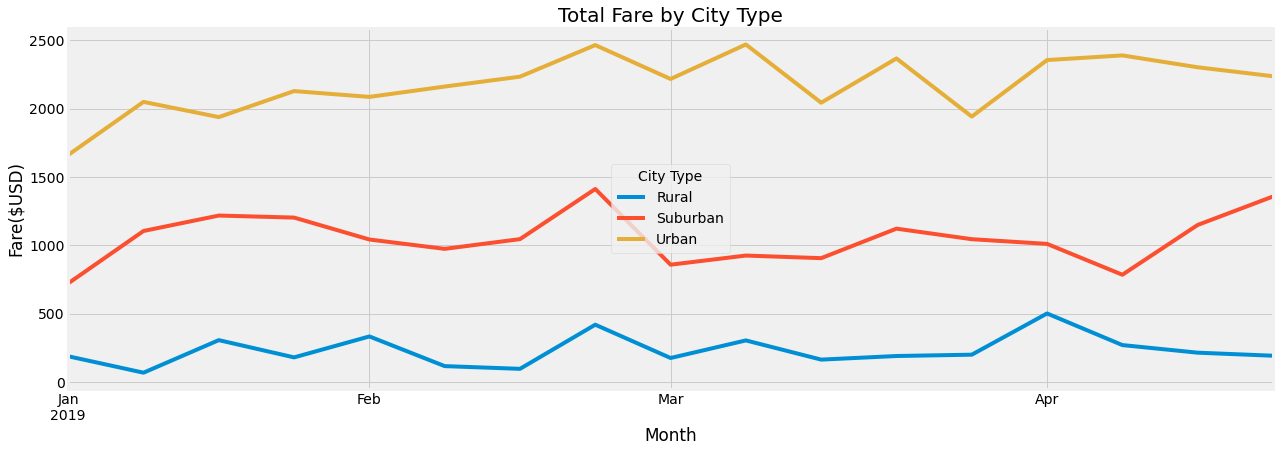

In [18]:

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Set the size of layout 18 x 6.5
plt.figure(figsize=(18,6.5))

# Use the fivethirtyeight style
plt.style.use('fivethirtyeight')

# Set title , x axis label, y axis label
plt.title("Total Fare by City Type",fontsize=20)
plt.xlabel("Month")
plt.ylabel("Fare($USD)")

# plot three series with line chartsd
plt.plot(total_fare_date_01_04_df.index,total_fare_date_01_04_df["Rural"],label="Rural")
plt.plot(total_fare_date_01_04_df.index,total_fare_date_01_04_df["Suburban"],label="Suburban")
plt.plot(total_fare_date_01_04_df.index,total_fare_date_01_04_df["Urban"],label="Urban")

# Set the start value date and end value date
plt.xlim(left = np.datetime64('2019-01-06'),right=np.datetime64('2019-04-28'))

# Set the x axis major ticks with labels
datelist = np.array(['2019-01-06', '2019-02-03', '2019-03-03','2019-04-07'], dtype='datetime64')
datelabels = ["Jan\n2019","Feb","Mar","Apr"]
plt.xticks(datelist,labels = datelabels)

# Turn on legend
plt.legend(title="City Type")

# Trim out all space
plt.tight_layout()

# Save the chart to image
plt.savefig("analysis/challenge5.png")

# show chart
plt.show()